# A2: Constrained Optimization

---

*Purpose*: Many engineering problems have constraints, whether those are the laws of physics, safety considerations, or legal requirements. Constraints greatly complicate optimization, both in the analysis of optimality conditions and in the practical design of algorithms. In this assignment you'll get some practice solving constrained optimization problems, and applying these tools to support *materials selection*.

*Learning Objectives*:
- use Pandas to work with data
- learn and apply the KKT conditions for constrained optimality
- use `scipy.optimize.minimize` for constrained optimization problems
- use the KKT conditions to derive materials indices
- use materials indices to do materials selection

*Reading*:
- Kochenderfer and Wheeler, Ch 10.4, 10.5



### Assignment Checklist

1. [?] Make sure you have answered all questions. These are marked with a **qX.Y**
1. [?] Make sure you complete the Project Task at the end of the assignment. These will scaffold your project progress during the semester.
1. [?] Make sure your notebook passes all `assert()` statements. You will not get full credit for the assignment if a single `assert()` fails.
1. [?] Make sure your notebook runs: `Kernel > Restart kernel and run all cells...`
1. [?] Upload your notebook to Canvas.


### Grading Rubric

Every assignment is worth 10 points; it is not possible to receive less than 0 points. For each question (qX.Y) on a given assignment, the following grading rubric will be applied. For every NI that you receive, one point will be subtracted from your assignment total. For reference, to receive an A- in this class, you will need an average of 9 points across your 5 best assignments, meaning you need to have at most one mistake on your final submission for 5 assignments. To achieve this, you should take advantage of both the Draft and Final submission deadlines.

| Category     | Needs Improvement (NI)                     | Satisfactory (S)                       |
|--------------|--------------------------------------------|----------------------------------------|
| Effort       | qX.Y left unattempted                      | qX.Y attempted                         |
| Assertions   | Code does not pass an `assert()`           | All `assert()`s pass, or no assertions |
| Observations | Any point under *observe* left unattempted | All *observe*s attempted and correct,  |
|              | Provided an incorrect observation          | or no *observe*s for that q            |


## S1: Pandas DataFrames

---

[Pandas](https://pandas.pydata.org/) is a package for representing and analyzing `pan`el `da`ta; it provides a data structure called a *DataFrame*. Grama models are evaluated using DataFrames and return results in the form of a DataFrame, so we'll need to understand some pandas basics to work with Grama. (Plus pandas itself is a *super useful* package.)

*Aside*: A colleague of mine in industry once claimed that *the* reason to learn Python was so that one could use Pandas. I don't 100% agree with that reasoning, but it underscores how useful this library is!


In [1]:
import grama as gr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import scipy as sp
DF = gr.Intention()

# Set figure options
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

The following code creates a *DataFrame* and prints it.


In [2]:
# NOTE:
df_example = pd.DataFrame(
    dict(
        x=[1, 2, 3],
        y=[4, 5, 6],
        c=["a", "b", "c"]
    )
)

# NOTE: Simply writing a DataFrame at the end of a Jupyter cell
#       prints the DataFrame below the cell
df_example


,x,y,c
0,1,4,a
1,2,5,b
2,3,6,c


A DataFrame is a set of *rectangular* data; it has rows that represent observations, and columns that represent variables. Since Grama models take a DataFrame as input, you'll need to know how to create DataFrames to evaluate models.

### q1.1 Create a DataFrame

Use `pd.DataFrame` to create the following table:

| `x` | `y` |
|---|---|
| 1 | 0 |
| 1 | 1 |


In [3]:
###
# TASK: Create the DataFrame above
###

# TASK: 
df_q1_1 = pd.DataFrame(dict(x=[1,1], y=[0,1]))


# NOTE: No need to edit; this will check your answer
assert(df_q1_1.equals(gr.df_make(x=1, y=[0, 1])))
print("Success!")


Success!


We can load data from a file; the following code loads a CSV into memory.

In [4]:
# NOTE: No need to edit; this loads data
filename_aircraft = "wing_weight.csv"

df_aircraft = pd.read_csv(filename_aircraft)
df_aircraft


,Group,Name,Symbol,Units,Citation 500 Series,MDAT 30,MDAT 50,F-28,MDAT 70,DC-9-10,...,DC-10-40,747,SCAT-15,C-130A,C130E,KC-135A,C-133B,C-141A,C-5A,AST
0,wing,wing_system_weight,W_1,lbs,1020.000,3143.000,4360.000,7526.000,5910.000,9366.000,...,57748.000,88741.000,83940.000,10593.000,11647.000,24719.000,27064.000,34262.000,81782.000,20560.0
1,wing,takeoff_gross,TOGW,lbs,11500.000,34480.000,46850.000,62000.000,61000.000,86300.000,...,565000.000,775000.000,631000.000,108000.000,155000.000,275000.000,286000.000,316100.000,728000.000,163500.0
2,wing,zero_fuel_weight,ZFW,lbs,8900.000,27450.000,37760.000,47600.000,49460.000,71800.000,...,391000.000,526500.000,364550.000,87290.000,107890.000,190380.000,215000.000,204500.000,542800.000,143000.0
3,wing,trap_area,S_W,sq_ft,269.000,342.000,464.000,822.000,605.000,934.000,...,3610.000,4960.000,10744.000,1808.000,1808.000,2453.000,2673.000,3000.000,6200.000,1890.0
4,wing,wing_loading,W/S,lb/sq_ft,43.000,101.000,101.000,75.000,101.000,92.000,...,157.000,156.000,59.000,60.000,86.000,112.000,107.000,105.000,117.000,87.0
5,wing,aspect_ratio,AR,-,7.100,9.000,9.000,7.270,9.000,8.600,...,7.200,7.700,1.600,9.700,9.700,7.000,12.100,8.500,7.700,7.0
6,wing,taper_ratio,lambda,-,0.390,0.300,0.300,0.361,0.300,0.254,...,0.273,0.356,0.096,0.440,0.440,0.331,0.226,0.335,0.338,0.3
7,wing,average_t_to_c,t/c,-,0.123,0.143,0.143,0.129,0.143,0.116,...,0.112,0.122,0.029,0.147,0.147,0.148,0.163,0.121,0.119,0.1
8,wing,sweep_ang_qt_chord,Omega C/4,degrees,1.400,4.900,4.900,16.000,4.900,24.000,...,35.000,37.500,0.000,0.000,0.000,35.000,0.000,25.000,24.500,25.0
9,wing,ultimate_load_factor,U,-,6.300,3.750,3.750,5.140,3.750,3.750,...,3.750,3.750,3.750,4.500,3.750,3.000,3.750,3.750,3.750,5.1


You can also use `df.to_csv(filename)` to write a DataFrame `df` to a target CSV with the name `filename`. This is helpful for storing and sharing results.

We can access individual columns with `.` notation:


In [5]:
# NOTE: No need to edit
#       dot (.) notation allows us to access a single column
df_aircraft.Group
# NOTE: You can also use ["column"] notation;
#       this is necessary for column names with spaces
df_aircraft["MDAT 30"]


0      3143.000
1     34480.000
2     27450.000
3       342.000
4       101.000
5         9.000
6         0.300
7         0.143
8         4.900
9         3.750
10      500.000
11     1010.000
12      405.000
13      605.000
14      112.000
15      104.000
16     4276.000
17       30.000
Name: MDAT 30, dtype: float64

*Aside*: A pandas column is a a different data structure called a [series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

### q1.2 Access a column

Access the `"MDAT 70"` column.


In [6]:
###
# TASK: Access the `MDAT 70` column
###

df_aircraft["MDAT 70"]



0      5910.000
1     61000.000
2     49460.000
3       605.000
4       101.000
5         9.000
6         0.300
7         0.143
8         4.900
9         3.750
10     1188.000
11     1505.000
12      645.000
13      860.000
14      177.000
15      147.000
16     7118.000
17       70.000
Name: MDAT 70, dtype: float64

We can use column values to do a number of useful tasks, such as *filtering* the dataset based on logical matches. For instance, if we were looking for rows where the `Group` is that of the wing, the following would give us a boolean column where `True` corresponds to cases of a match.


In [7]:
# NOTE: No need to edit
#       Use equality to test equality
df_aircraft.Group == "wing"


0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
Name: Group, dtype: bool

We can then use `[]` notation with a boolean series to select only those rows that match the criteria:


In [8]:
# NOTE: No need to edit
#       Filter the data for Group == "wing"
df_aircraft[df_aircraft.Group == "wing"]


,Group,Name,Symbol,Units,Citation 500 Series,MDAT 30,MDAT 50,F-28,MDAT 70,DC-9-10,...,DC-10-40,747,SCAT-15,C-130A,C130E,KC-135A,C-133B,C-141A,C-5A,AST
0,wing,wing_system_weight,W_1,lbs,1020.000,3143.000,4360.000,7526.000,5910.000,9366.000,...,57748.000,88741.000,83940.000,10593.000,11647.000,24719.000,27064.000,34262.000,81782.000,20560.0
1,wing,takeoff_gross,TOGW,lbs,11500.000,34480.000,46850.000,62000.000,61000.000,86300.000,...,565000.000,775000.000,631000.000,108000.000,155000.000,275000.000,286000.000,316100.000,728000.000,163500.0
2,wing,zero_fuel_weight,ZFW,lbs,8900.000,27450.000,37760.000,47600.000,49460.000,71800.000,...,391000.000,526500.000,364550.000,87290.000,107890.000,190380.000,215000.000,204500.000,542800.000,143000.0
3,wing,trap_area,S_W,sq_ft,269.000,342.000,464.000,822.000,605.000,934.000,...,3610.000,4960.000,10744.000,1808.000,1808.000,2453.000,2673.000,3000.000,6200.000,1890.0
4,wing,wing_loading,W/S,lb/sq_ft,43.000,101.000,101.000,75.000,101.000,92.000,...,157.000,156.000,59.000,60.000,86.000,112.000,107.000,105.000,117.000,87.0
5,wing,aspect_ratio,AR,-,7.100,9.000,9.000,7.270,9.000,8.600,...,7.200,7.700,1.600,9.700,9.700,7.000,12.100,8.500,7.700,7.0
6,wing,taper_ratio,lambda,-,0.390,0.300,0.300,0.361,0.300,0.254,...,0.273,0.356,0.096,0.440,0.440,0.331,0.226,0.335,0.338,0.3
7,wing,average_t_to_c,t/c,-,0.123,0.143,0.143,0.129,0.143,0.116,...,0.112,0.122,0.029,0.147,0.147,0.148,0.163,0.121,0.119,0.1
8,wing,sweep_ang_qt_chord,Omega C/4,degrees,1.400,4.900,4.900,16.000,4.900,24.000,...,35.000,37.500,0.000,0.000,0.000,35.000,0.000,25.000,24.500,25.0
9,wing,ultimate_load_factor,U,-,6.300,3.750,3.750,5.140,3.750,3.750,...,3.750,3.750,3.750,4.500,3.750,3.000,3.750,3.750,3.750,5.1


### q1.3 Filter for matching units

Filter the DataFrame for only those rows that have `Units == "lbs"`.


In [9]:
###
# TASK: Filter the DataFrame to rows with Units == "lbs"
###

# TASK: Filter the DataFrame
df_filtered = df_aircraft[df_aircraft.Units == "lbs"]


# NOTE: No need to edit; this checks your answer
assert((df_filtered.Units == "lbs").all())
print("Success!")


Success!


Filtering a dataset and selecting columns helps us to create useful visualizations of data. For instance, the following code creates a plot of the weights of components on the "Citation 500 Series" aircraft.


Text(0.5, 1.0, 'Citation 500 Component Weights')

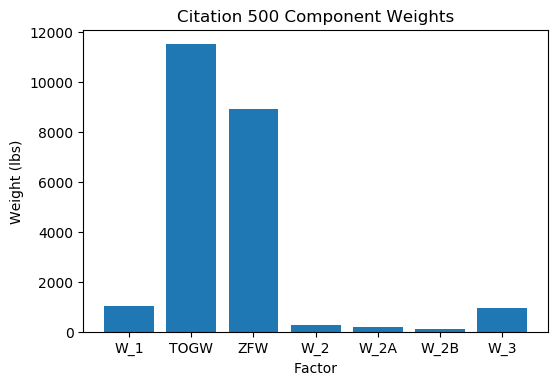

In [10]:
# NOTE: No need to edit; just some example code
plt.figure()
plt.bar(df_filtered.Symbol, df_filtered["Citation 500 Series"])

plt.xlabel("Factor")
plt.ylabel("Weight (lbs)")
plt.title("Citation 500 Component Weights")


When column names are difficult to work with, we can use `rename` to provide more convenient column names.


In [11]:
# NOTE: No need to edit; run and inspect
df_aircraft.rename(
    # Provide a dict to define new names for columns
    {
        # original_name : new_name
        "Citation 500 Series": "citation",
        "MDAT 30": "mdat30",
        "MDAT 50": "mdat50",
    }, 
    axis=1 # axis = 1 denotes columns (rather than rows)
).head()


,Group,Name,Symbol,Units,citation,mdat30,mdat50,F-28,MDAT 70,DC-9-10,...,DC-10-40,747,SCAT-15,C-130A,C130E,KC-135A,C-133B,C-141A,C-5A,AST
0,wing,wing_system_weight,W_1,lbs,1020.0,3143.0,4360.0,7526.0,5910.0,9366.0,...,57748.0,88741.0,83940.0,10593.0,11647.0,24719.0,27064.0,34262.0,81782.0,20560.0
1,wing,takeoff_gross,TOGW,lbs,11500.0,34480.0,46850.0,62000.0,61000.0,86300.0,...,565000.0,775000.0,631000.0,108000.0,155000.0,275000.0,286000.0,316100.0,728000.0,163500.0
2,wing,zero_fuel_weight,ZFW,lbs,8900.0,27450.0,37760.0,47600.0,49460.0,71800.0,...,391000.0,526500.0,364550.0,87290.0,107890.0,190380.0,215000.0,204500.0,542800.0,143000.0
3,wing,trap_area,S_W,sq_ft,269.0,342.0,464.0,822.0,605.0,934.0,...,3610.0,4960.0,10744.0,1808.0,1808.0,2453.0,2673.0,3000.0,6200.0,1890.0
4,wing,wing_loading,W/S,lb/sq_ft,43.0,101.0,101.0,75.0,101.0,92.0,...,157.0,156.0,59.0,60.0,86.0,112.0,107.0,105.0,117.0,87.0


### q1.4 Rename the columns

Rename the columns of `df_aircraft` to have all lower-case column names.

*Hint*: Read the documentation for `pd.DataFrame.rename()`; you can provide a *function* to mapper, such as `gr.str_to_lower()`.


In [12]:
###
# TASK: Rename df_aircraft to have lower-case columns
###

# TASK:
new_names = dict()
for i in df_aircraft:
    new_names[i] = gr.str_to_lower(i)

# print(new_names)
df_lower= df_aircraft.rename(new_names, axis=1)


# NOTE: No need
assert(all(map(lambda s: s == s.lower(), df_lower.columns)))
print("Success!")


Success!


One last note on working with DataFrames: Grama makes heavy use of DataFrames internally, so if you're willing to work in this datatype you can make your code much more efficient. Namely, if your model functions are simple analytic expressions, you can benefit from *vectorizing* your functions. You can do so with the following recipe:

In [13]:
## NOTE: No need to edit; example vectorized function
md_vec = (
    gr.Model()
    # vec_function signals that we're going to provide 
    # a vectorized function
    >> gr.cp_vec_function(
        # Our function needs to both take and return a DataFrame;
        # gr.df_make() is a helper to compactly create a DataFrame
        fun=lambda df: gr.df_make(
            # We can access the variables of the DataFrame provided
            # as an input
            f=df.x + df.y
        ),
        # We still need to specify the inputs, because Grama can't
        # read this information from the lambda function provided
        var=["x", "y"],
        # Ditto for the outputs
        out=["f"],
    )
)

Ok! That's enough pandas for now; back to optimization:


## S2: The KKT Conditions

---

The [Karush-Kuhn-Tucker](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) (KKT) conditions are a set of tests to check if a point $x$ in the domain of a **constrained** optimization problem could be optimal. KKT plays the same role as the FONC for unconstrained problems.

For simple optimization problems we can use the KKT conditions to find a critical value, but note that we still need to *check* if that value is an maximum or a minimum. Even when we can't apply KKT directly, these conditions help us *organize our thinking* about constrained optimization problems.

The KKT conditions apply to a *generic* constrained optimization problem in *standard form*:

$$\min\, f(x)$$
$$\text{wrt.}\, x$$
$$\text{s.t.}\, g_i(x) \leq 0$$
$$\text{s.t.}\, h_j(x) = 0$$

Thus the KKT conditions simultaneously consider an objective function $f$ and any number of inequality $g_i \leq 0$ and equality $h_j = 0$ constraints.

Before going straight to the full KKT conditions, let's build some intuition for equality and inequality constraints separately.


### Equality Constraints

An equality constraint *severely* restricts the domain of our optimization problem. An equality constraint will tend to 

$$\min\, f(x, y) = x^2 + y^2$$
$$\text{wrt.}\, x, y$$
$$\text{s.t.}\, x + y = 2$$

First, we should translate this into *standard form*:

$$\min\, f(x, y) = x^2 + y^2$$
$$\text{wrt.}\, x, y$$
$$\text{s.t.}\, h(x, y) \equiv x + y - 2 = 0$$


### q2.1 Interpret constrained optimization result

The following code visualizes the constrained optimization problem above; run the code, study the figure, and answer the questions below.


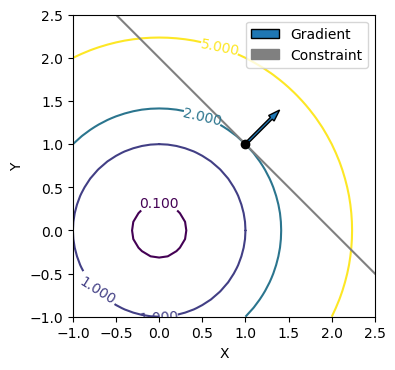

In [14]:
# NOTE: No need to edit, run and inspect
# Objective function
fun_bowl = lambda X: X[0]**2 + X[1]**2
# Gradient
grad_bowl = lambda X: np.array([X[0], X[1]])
# Constraint, as line
fun_line = lambda x: -x + 2

# Contour data
delta = 0.1
x = np.arange(-1, +3, delta)
y = np.arange(-1, +3, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = fun_bowl([X[i, j], Y[i, j]])
# Constraint data
y_line = list(map(fun_line, x))
# Gradient data
x_s = np.array([1, 1])
g_s = grad_bowl(x_s) * 0.3
        
# Create contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=[0.1, 1.0, 2.0, 5.0])
plt.plot(x, y_line, color="gray")
plt.plot(x_s[0], x_s[1], "k.", markersize=12)
a_grad = plt.arrow(
    x_s[0], # x base
    x_s[1], # y base
    g_s[0], # dx
    g_s[1], # dy
    width=0.03,
)

# Use proxy artists for legend
a_con = mpatches.Patch(color='gray', label='Constraint')

# Plot tail
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim((-1.0, +2.5))
plt.ylim((-1.0, +2.5))
ax.set_aspect(aspect=1)
plt.legend([a_grad, a_con], ["Gradient", "Constraint"], loc=0)


Note that the gray line above depicts the set of points where $h(x, y) = 0$.

*Observe*:

- Roughly, where would the *unconstrained* minimum of the objective function lie?
  - $(0,0)$
- Roughly, where does the *constrained* minimum of the optimization problem lie?
  - $(1,1)$
- What value does the constraint take at the constrained optimum, $h(x^*) = ?$
  - $h(1,1) = 1 + 1 - 2 = 0$
- What is the relationship between the gradient of the objective $\nabla_x f(x^*)$ and the gradient of the constraint $\nabla_x h(x^*)$ *at the constrained minimizer* $x^*$? How do you represent this relationship as an *equation*?
  - The gradient of the objective function is pointed in the same direction as the gradient of the constraint: perpendicular to the contourof the objective function.  $\nabla_x f(x^*) = \lambda * \nabla_x h(x^*)$


### The Lagrangian

On our way to the KKT conditions we can first consider *lagrange's method*, which considers equality constraints only. The *lagrangian* for an equality-constrained optimization problem is

$$L(x, \lambda) = f(x) - \lambda h(x).$$

where $\lambda$ is a new variable known as a *lagrange multiplier*. Note that $\nabla L(x, \lambda)$ is the gradient of $L$ with respect to **all** of its arguments, that is $\nabla L = [\nabla_x L, \nabla_{\lambda} L]$. Thus, if we set $\nabla L = 0$, this is equivalent to setting $\nabla_x f - \lambda \nabla_x h = 0$ and $h(x) = 0$. Solving both of these equations will give a critical point of the equality-constrained optimization problem.

Essentially, lagrange's method turns an equality-constrained optimization problem into an *unconstrained* problem:

$$\min\, L(x, \lambda)$$
$$\text{wrt.}\, x, \lambda$$

Critical points of this new unconstrained optimization problem will be critical points of our original equality-constrained optimization problem.

For multiple equality constraints, we can formulate a lagrangian incorporating each equality:

$$L(x, \lambda_1, \dots, \lambda_m) = f(x) - \sum_{j=1}^m \lambda_j h_j(x).$$

## Aside: Feasibility

Once we start adding multiple constraints, it's very easy to construct optimization problems where one cannot satisfy all constraints simultaneously. An optimization problem where all constraints cannot be satisfied is said to be *infeasible*.

The following code demonstrates one such example with the equality constraints $h_1 \equiv x + y - 2 = 0$ and $h_2 \equiv x + y - 1.5 = 0$.


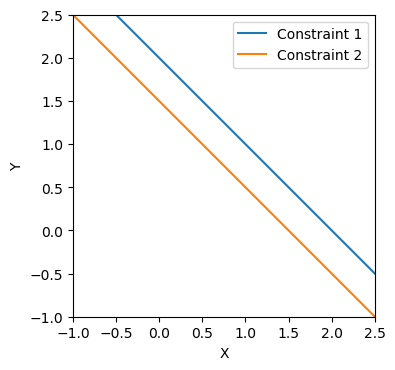

In [15]:
# NOTE: No need to edit, run and inspect
# Constraint, as line
fun_line1 = lambda x: -x + 2
fun_line2 = lambda x: -x + 1.5

# Contour data
delta = 0.1
x = np.arange(-1, +3, delta)
# Constraint data
y_line1 = list(map(fun_line1, x))
y_line2 = list(map(fun_line2, x))
        
# Create contour plot
fig, ax = plt.subplots()
plt.plot(x, y_line1, label="Constraint 1")
plt.plot(x, y_line2, label="Constraint 2")

# Plot tail
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim((-1.0, +2.5))
plt.ylim((-1.0, +2.5))
ax.set_aspect(aspect=1)
plt.legend(loc=0)


Clearly, these two parallel lines will never intersect, so there is no way to satisfy both constraints at the same time. Therefore we should be cautious when adding equality constraints to a problem: We can easily make the problem infeasible!


## Inequality Constraints

Equality constraints are conceptually simple to apply; they *must* be true for the optimization to be satisfied. However *inequality* constraints allow for a great deal more complexity.

For instance, the following visualizes the previous "bowl" optimization problem, but with an inequality constraint instead:

$$\min\, f(x, y) = x^2 + y^2$$
$$\text{wrt.}\, x, y$$
$$\text{s.t.}\, g(x, y) \equiv -(x + y - 2) \leq 0$$


Text(0.5, 1.0, 'Minimizer unchanged, constraint active')

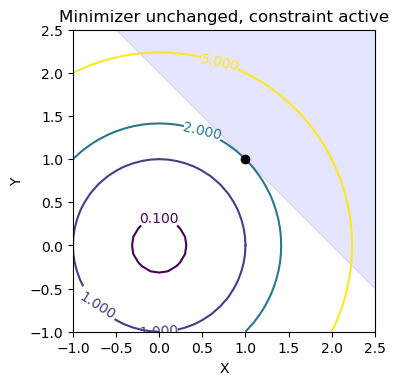

In [16]:
# NOTE: No need to edit, run and inspect
# Objective function
fun_bowl = lambda X: X[0]**2 + X[1]**2
# Gradient
grad_bowl = lambda X: np.array([X[0], X[1]])
# Constraint, as line
fun_line = lambda x: -x + 2

# Contour data
delta = 0.1
x = np.arange(-1, +3, delta)
y = np.arange(-1, +3, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = fun_bowl([X[i, j], Y[i, j]])
# Constraint data
y_line = list(map(fun_line, x))
# Gradient data
x_s = np.array([1, 1])
g_s = grad_bowl(x_s) * 0.3
        
# Create contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=[0.1, 1.0, 2.0, 5.0])
plt.fill_between(x, y_line, 2.5, color="blue", alpha=0.1)
plt.plot(x_s[0], x_s[1], "k.", markersize=12)

# Plot tail
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim((-1.0, +2.5))
plt.ylim((-1.0, +2.5))
ax.set_aspect(aspect=1)
plt.title("Minimizer unchanged, constraint active")


The shaded region depicts the *feasible region* of the optimization problem---the set of points that satisfy the constraints. Note that in this example, the minimizer is in the same location it was when the constraint was an equality.

In the case above, the inequality constraint is said to be **active**. This occurs when equality is met, that is $g(x^*) = 0$.

The next version of the same problem has a very different result:


Text(0.5, 1.0, 'Minimizer changed, constraint inactive')

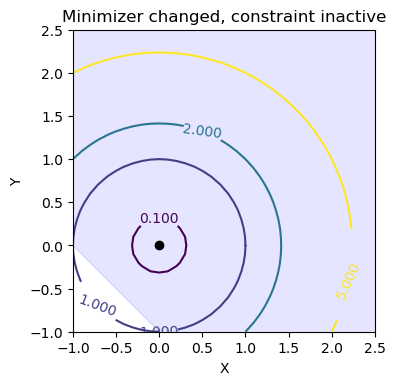

In [17]:
# NOTE: No need to edit, run and inspect
# Objective function
fun_bowl = lambda X: X[0]**2 + X[1]**2
# Gradient
grad_bowl = lambda X: np.array([X[0], X[1]])
# Constraint, as line
fun_line = lambda x: -x - 1

# Contour data
delta = 0.1
x = np.arange(-1, +3, delta)
y = np.arange(-1, +3, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = fun_bowl([X[i, j], Y[i, j]])
# Constraint data
y_line = list(map(fun_line, x))
# Gradient data
x_s = np.array([0, 0])
        
# Create contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=[0.1, 1.0, 2.0, 5.0])
plt.fill_between(x, y_line, 2.5, color="blue", alpha=0.1)
plt.plot(x_s[0], x_s[1], "k.", markersize=12)

# Plot tail
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim((-1.0, +2.5))
plt.ylim((-1.0, +2.5))
ax.set_aspect(aspect=1)
plt.title("Minimizer changed, constraint inactive")


Here the minimizer does not lie along the constraint; instead, it is in the interior of the feasible region. In this case the inequality does not affect the optimum value of the optimization problem.

In the case above, the inequality constraint is said to be **inactive**. This occurs when the inequality is strict $g(x^*) < 0$.


### q2.2 Interpret this landscape

The following figure depicts the optimization problem:

$$\min\, f(x, y) = x^2 + y^2$$
$$\text{wrt.}\, x, y$$
$$\text{s.t.}\, g_1 = -(x + y + 1) \leq 0$$
$$\text{s.t.}\, g_2 = -(-x + y -\sqrt{2/10}) \leq 0$$

Use `sp.optimize.minimize` to solve this *constrained* optimization problem.

*Hint*: The [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) for `minimize` is relevant but vague. The keyword argument `constraints` is what you need to set your constraints. This argument expects a *list of dictionaries*, so the constraints $h_1(x) = 0, h_2(x) \geq 0$ would be given by `constraints=[dict(type="eq", fun=h_1), dict(type="ineq", fun=h_2)]`. This means you will need to negate a $\leq$ inequality constraint to obtain a $\geq$ constraint when using scipy's `minimize()`.


[-0.2236068  0.2236068]


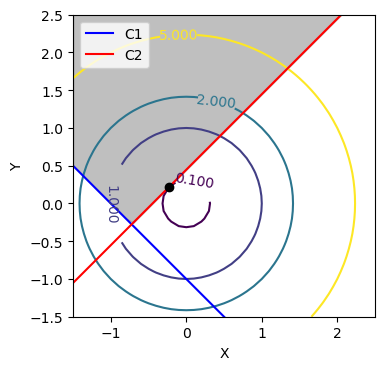

In [18]:
###
# TASK: Solve the constrained optimization problem
#       with sp.optimize.minimize
###

# NOTE: No need to edit, this sets up the optimization problem
# Objective function
fun_bowl = lambda X: X[0]**2 + X[1]**2
fun_c1 = lambda X: (+X[0] + X[1] + 1)
fun_c2 = lambda X: (-X[0] + X[1] - np.sqrt(2/10))

# TASK: Solve the constrained optimization problem with sp.optimize.minimize
res = sp.optimize.minimize(fun=fun_bowl,x0=[0,0], constraints=[dict(type="ineq", fun=fun_c1), dict(type="ineq", fun=fun_c2)])
x_s = res.x
print(x_s)
# x_s = [0,0]

# NOTE: No need to edit below; this visualizes your results
# Constraints, as line
fun_line1 = lambda x: -x - 1
fun_line2 = lambda x: +x + np.sqrt(2 / 10)
# Contour data
delta = 0.1
x = np.arange(-1.5, +3, delta)
y = np.arange(-1.5, +3, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = fun_bowl([X[i, j], Y[i, j]])
# Constraint data
y_line1 = list(map(fun_line1, x))
y_line2 = list(map(fun_line2, x))
y_comb = list(map(np.max, zip(y_line1, y_line2)))
        
# Create contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=[0.1, 1.0, 2.0, 5.0])
plt.fill_between(x, y_comb, 2.5, color="gray", alpha=0.5)
plt.plot(x, y_line1, color="blue", label="C1")
plt.plot(x, y_line2, color="red", label="C2")
plt.plot(x_s[0], x_s[1], "k.", markersize=12)

# Plot tail
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim((-1.5, +2.5))
plt.ylim((-1.5, +2.5))
ax.set_aspect(aspect=1)
plt.legend(loc=0)


*Observe*:

- Where does the optimal value lie for this inequality-constrained optimization problem?
  - (-0.2236068  0.2236068)
- Which constraints (among C1, C2) are **active** in this problem?
  - C2
- Which constraints (among C1, C2) are **inactive** in this problem?
  - C1


This option for inequality constraints to be either active $g(x^*) = 0$ or inactive $g(x^*) < 0$ complicates the conditions for optimality; we have to account for the possibility of an active or inactive constraint. It is this complexity that gives rise to the *Karush-Kuhn-Tucker* conditions.

## Karush-Kuhn-Tucker (KKT) Conditions

For a general minimization problem

$$\min\, f(x)$$
$$\text{wrt.}\, x$$
$$\text{s.t.}\, g_i(x) \leq 0$$
$$\text{s.t.}\, h_j(x) = 0,$$

construct the lagrangian

$$L(x, \lambda, \mu) = f(x) + \sum_{i=1}^m \mu_i g_i(x) + \sum_{j=1}^l \lambda_j h_j(x),$$

where $x$ are called the *primal variables* and $\mu, \lambda$ are called the *dual variables*.

With the KKT conditions, we seek values for $x^*, \mu^*, \lambda^*$ that satisfy four conditions:

1. Stationarity

$$\nabla_x L(x^*, \mu^*, \lambda^*) = 0$$

This condition requires alignment of the objective gradient with *select* terms in the lagrangian.

2. Primal Feasibility

$$g_i(x^*) \leq 0\text{, for }i=1,\dots,m$$

$$h_j(x^*) = 0\text{, for }j=1,\dots,l$$

This is the "ordinary" feasibility of the problem; satisfaction of all constraints.

3. Dual Feasibility

$$\mu_i^* \geq 0\text{, for }i=1,\dots,m$$

This is an additional feasibility condition, added to deal with the complexity of active/inactive constraints. It is formulated in terms of the *dual variables* $\mu$.

4. Complementary Slackness

$$\mu_i^* g_i(x^*) = 0\text{, for }i=1,\dots,m$$

This is a neat mathematical trick for expressing the (in)activity of an inequality constraint; either $\mu_i$ or $g_i$ must be zero for this expression to hold (for all $i$).
- If $g_i(x^*) = 0$ then the i-th constraint is active; the term $\mu_i^* g_i(x^*)$ **does contribute** to the stationarity condition $\nabla_x L = 0$.
- If $\mu_i^* = 0$ then the i-th constraint is inactive; the term $\mu_i^* g_i(x^*)$ **does not contribute** to the stationarity condition $\nabla_x L = 0$.


## Applying KKT

The KKT conditions are not an algorithm so much as a way to organize information about an optimization problem. To illustrate how this works, let's take a look at the following optimization problem:

$$\min\, f = x^2$$
$$\text{wrt.}\, x$$
$$\text{s.t.}\, 0 \leq x$$
$$\text{s.t.}\, k \leq x$$

where $k$ is a constant satisfying $k > 0$.


### q2.3 Translate into standard form

Translate this optimization problem into standard form.

min f = x^2

wrt. x

s.t. g_1(x) =  -x <= 0

s.t. g_2(x) = k - x  <= 0


### q2.4 Write down the KKT conditions

Derive the lagrangian for the problem, and write down the KKT conditions for this standard optimization problem.

*Hint*: The KKT conditions for this problem should include 3 equalities and four inequalities.

$L(x) = f(x) + \mu_1 g_1 + \mu_2 g_2$

$ 0 = \nabla_x f - \mu_1 \nabla g_1 - \mu_2 \nabla g_2$

$g_1(x^*) \leq 0 $

$g_2(x^*) \leq 0 $

$\mu_1 \geq 0 $

$\mu_2 \geq 0 $

$\mu_1 g_1 = 0 $

$\mu_2 g_2 = 0 $

### q2.5 Check slackness scenarios

Using the KKT conditions, determine which of the following scenarios are possible:

Fill in this table

| Scenario | Possible? | Why |
|----------|-----------|-----|
| $g_1=0, g_2=0$ | no | -x = 0, k - x = 0 -> x = 0, k = 0, does not satisfy k > 0 |
| $g_1=0, \mu_2=0$ | no | -x = 0, k - x < 0 -> x = 0, k < 0, does not satisfy k > 0 |
| $\mu_1=0, g_2=0$ | yes | -x < 0, k - x = 0 -> x > 0, k = x, satifies constraints |
| $\mu_1=0, \mu_2=0$ | no | g_2 is active so mu_2 needs to be > 0 |





### q2.6 Solve the optimization problem

In q2.5 you should have found only one possible scenario. Solve the optimization by using that slackness scenario. Report the minimizer $x^*, \mu_1^*, \mu_2^*$ and minimum $f^*$.

$\mu_1 = 0$

$x^* = k$

$f^* = k^2$

$\nabla{f_x} = 2x$

$\nabla{g_2{x}} = -1$

$\nabla{f_x} + \mu_2 \nabla{g_2{x}} = 0$

$2x - \mu_2 = 0$

$\mu_2 = 2x$


*Aside*: Technically, you also need to check that your optimum is actually a minimum (rather than a maximum!) by applying the [Second-order sufficient conditions](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions#Second-order_sufficient_conditions). It turns out this problem has only one critical point, and that is the minimum.


## S3: Case Study: Materials Selection

---

[Material selection](https://en.wikipedia.org/wiki/Material_selection) is a key part of engineering design. Selecting a material affects things like the performance of a system and how it will be manufactured. One of the factors we consider in material selection is a quantitative index of performance called the *material index*.

You might be familiar with the strength-to-weight ratio $I_{\text{Tie, Strength}} = \sigma_y / \rho$ of a material, described by the material strength $\sigma_y$ and its density $\rho$. It turns out this is the governing property only for *certain loading conditions*; the form of $I_{\text{Tie, Strength}}$ given above is for a [tie](https://en.wikipedia.org/wiki/Tie_(engineering)) (a straight member in tension). The strength-to-weight ratio is actually derived from an optimization problem:

$$\min\, m = \rho L A$$
$$\text{wrt.}\, A$$
$$\text{s.t.}\, P/A \leq \sigma_y$$
$$\text{s.t.}\, 0 \leq A$$

That is, the minimum-mass tie, optimizing over cross-sectional area $A$, constrained by its strength. Solving this optimization problem yields $m_{\text{Tie, Strength}}^* = \rho L P / \sigma_y$. Note that if we re-arrange the terms in this optimum value, we can write

$$m_{\text{Tie, Strength}}^* = \left(\frac{\rho}{\sigma_y}\right) \left(LP\right)$$

We can then minimize the mass by selecting a material to minimize the quantity $\rho / \sigma_y$; the remaining terms in $m_{\text{Tie, Strength}}^*$ are geometric and loading factors. It is conventional to invert this factor so that maximizing the resulting *material index* yields the minimum-mass tie. Thus the material index for the tie problem

$$I_{\text{Tie, Strength}} = \frac{\sigma_y}{\rho}$$

is a performance indicator where a larger $I_{\text{Tie, Strength}}$ corresponds to a higher-performing material. 

Note that changing the structural element, the objective, *or the optimization variable* will tend to change the form of the material index, as you'll see below!


## A Different Use Case

In this case study, you will derive and apply a material index for a minimum-mass, strength-constrained cantilever beam. The optimization problem is defined by:

$$\min\, m = \rho L t^2$$
$$\text{wrt.}\, t$$
$$\text{s.t.}\, 6\frac{FL}{t^3} \leq \sigma_y$$
$$\text{s.t.}\, 0 \leq t$$

where

| Symb. | Meaning |
|---|---|
| $m$ | Mass |
| $L$ | Length |
| $t$ | Thickness |
| $F$ | Applied load |
| $\sigma_y$ | Strength |
| $\rho$ | Density |


### q3.1 Solve for the minimum mass with the KKT conditions

Apply the KKT conditions to solve for the minimum-mass beam; separate the terms $\rho, \sigma_y$ into their own separate factor.

$ g_1 =  6FL - \sigma_y t^3 \leq 0$

$g_2  = -t \leq 0$

$L(t) = \rho t g^2 + \mu_1 g_1 + \mu_2 g_2$

#### KKT Conditions

$0 = \nabla{\rho L {t^*}^2} - \mu_1 \nabla{g_1} + \mu_2 \nabla{g_2}$

$g_1(x^*) \leq 0 $

$g_2(x^*) \leq 0 $

$\mu_1 \geq 0 $

$\mu_2 \geq 0 $

$\mu_1 g_1 = 0 $

$\mu_1 g_1 = 0 $



$t^* = {(\frac{6FL}{\sigma_y})}^{1/3}$

$m^* = \rho L {t^*}^2$

*Hint*: The KKT exercise we did above will be helpful here!

*Note*: You'll get a chance to check your solution in q3.2 below.


### q3.2 Formulate the beam-strength index

Isolate the material factors $\rho, \sigma_y$ and take their inverse to define the beam-strength index $I_{\text{beam, strength}}$. Implement this expression in a Grama model.

$$I_{\text{beam, strength}} = ???$$


In [19]:
###
# TASK: Implement the beam-strength index
###

# NOTE: No need to edit; use these variable names
var_index = ["rho", "sigma_y"]
out_index = ["I_beam"]

# TASK: Implement the beam-strength index
def fun_index(X):
    rho, sigma_y = X
    return np.power(sigma_y, 2/3)/rho

md_index = (
    gr.Model("Beam-Strength-Index")
    >> gr.cp_function(
        fun=fun_index,
        var=var_index,
        out=out_index,
    )

)

# NOTE: No need to edit; this checks your work
df_res = gr.eval_df(md_index, gr.df_make(sigma_y=2, rho=2))
print(df_res)
assert(abs(df_res.I_beam[0] - np.power(2., 2/3) / 2) < 1e-6)
print("Success!")


   sigma_y  rho    I_beam
0        2    2  0.793701
Success!


### q3.3 Rank materials

In order to do materials selection, we first need a set of materials to pick from! I've given you a set of material properties as a CSV file; load these into a DataFrame and evaluate your Grama model using these properties.

*Note*: The dataset I give you has both *mean* and *variability* (standard deviation) for each material property. For this task use the columns `mean_rho` as the density $\rho$ and `mean_Y` as the strength $\sigma_y$.


In [20]:
###
# TASK: Evaluate I_beam at the given material properties
# HINT: You'll need to `rename` columns from df_properties in
#       order to evaluate the model md_index at the given
#       material property values with `eval_df()`
###

filename_properties = "properties.csv"

# TASK: Load the material property dataset
df_properties = pd.read_csv(filename_properties)
df_properties = df_properties.rename(
    {
        "mean_rho":"rho",
        "mean_Y":"sigma_y"
    },
    axis=1
    
    
)

# TASK: Evaluate md_index at the given material properties
df_res = gr.eval_df(md_index, df_properties)

print(df_res)


# NOTE: No need to edit; the following will print your answers
(
    df_res
    >> gr.tf_rename(Material=DF.mat)
    >> gr.tf_select(DF.Material, DF.rho, DF.sigma_y, DF.I_beam)
    >> gr.tf_arrange(-DF.I_beam)
)


          mat     rho   sigma_y        mean_E  tau_rho  tau_Y  tau_E  \
0  Al 2024-T3  0.1000   50000.0  1.060000e+07     0.01   0.01   0.01   
1  Al 7075-T6  0.1020   73000.0  1.040000e+07     0.01   0.01   0.01   
2  Al 6061-T6  0.0975   40000.0  1.000000e+07     0.01   0.03   0.02   
3     Fe 1040  0.2834   60000.0  2.900000e+07     0.01   0.01   0.01   
4   Ti 6Al 4V  0.1600  160000.0  1.650000e+07     0.02   0.06   0.03   
5        CFRP  0.0506  140000.0  3.300000e+10     0.01   0.10   0.20   

         I_beam  
0  13572.088083  
1  17124.388351  
2  11995.970208  
3   5407.970589  
4  18420.157493  
5  53284.575094  


,Material,rho,sigma_y,I_beam
0,CFRP,0.0506,140000.0,53284.575094
1,Ti 6Al 4V,0.1600,160000.0,18420.157493
2,Al 7075-T6,0.1020,73000.0,17124.388351
3,Al 2024-T3,0.1000,50000.0,13572.088083
4,Al 6061-T6,0.0975,40000.0,11995.970208
5,Fe 1040,0.2834,60000.0,5407.970589


The full materials selection process (Ashby 1999) is a four-step procedure:

1. Translation - Translate design requirements into constraints
1. Screening - Use constraints to eliminate materials
1. Ranking - Rank screened materials based on material indices
1. Supporting information - Research the top-ranked materials in terms of other characteristics

In our case study, I have already done the Translation and Screening for you by providing a set database of materials to consider. You have just completed Ranking of the materials; now let's finish the process by Researching the top candidates.

### q3.4 Research materials

Research the **top three** materials listed above. Answer the following questions for each material:

- What is the material? (What is it made out of?)
- What manufacturing considerations would this material have?
- Is making parts with this material generally additive or subtractive?

Material 1: CFRP
- CFRP = Carbon fiber reinforced polymer
- This material probably requires extra assembly time due to the involved process of combining woven carbon fiber with resin and fiberglass. The material breaks only catostraphically making wear detection difficult.
- additive

Material 2:
- Ti-6Al-4V: titanium alloy
- Not very wear resistant and has poor shear strength but is corrision resistant
- subtractive and additive manufacturing

Material 3:
- Al 7075-T6: aluminum alloy
- normally exhibits good ductility and strength except in stress/temperature ranges that can cause the material to become brittle
- subtractive


## Finishing selection

To finish the selection process we would take a *holistic* approach, balancing the quantitative and qualitative information available. 

For instance, the highest-performing material for the minimum-mass, strength-constrained beam is (perhaps unsurprisingly) CFRP, due in part to its remarkably low density. However CFRP has poor material property stability across temperatures and humidities; if we were designing a high-risk system to be used in many different temperature settings (e.g. an aircraft), we might choose to use Ti6Al4V instead. For a less high-risk system that still operates in many environments (e.g. a bicycle), we might choose to overbuild the system and use CFRP anyway.

Optimization is often used to *guide* engineering decisions, but it is *rarely* the deciding factor alone.


## Project

---

### __Project Task__

Look back on your project idea from the previous assignment. As we saw in this assignment, we can use constraints to model requirements on a design. This project task will help you connect these ideas to your project.

*Task*: Provide an answer to each point below:
I am also considering a project involving maximizing the performance of a rocket engine in a vacuum based on a few variables (nozzle diameter, mass of nozzle, nozzle material?). The main tradeoff would be increasing the diameter of the nozzle to increase specific-impulse at the expense of increasing the weight of the engine. 

- *Stakeholder Concerns*: What concerns do your stakeholders have in your project outcome?
  - Buck Converter Project: consumer device designers. Want to minimize costs while meeting a performance threshold
  - Rocket Engine Project: Rocket Companies: maximize perfomance. 
  
- *Objectives or constraints*: Try to express those concerns mathematically. Are they best described as objectives or constraints? Do you have multiple objectives? Are your constraints equalities or inequalities?
  - Buck Converter: min Voltage_Ripple, min cost. max V_ripple will probably be an active inequality.
  - Rocket Engine: max nozzle dia <= dia of rocket. 
- *Hard-to-quantify factors*: Are any of your stakeholders' concerns difficult to quantify / express mathematically? If yes, how will you handle this supplementary information in your design process?
  - (Your response here)


## References

- Ashby, M. F., "Materials Selection in Mechanical Design" (1999); [link](https://archive.org/details/materialsselect000ashb/page/n1/mode/2up)